<a href="https://colab.research.google.com/github/yannfaiq/link-untuk-pycharm/blob/main/Pertemuan_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

adjacency_matrix = np.array([[0, 1, 0, 0],
                             [0, 0, 1, 0],
                             [0, 1, 0, 1],
                             [1, 0, 1, 0]])

damping_factor = 0.85

num_pages = len(adjacency_matrix)
page_rank = np.ones(num_pages) / num_pages

num_iterations = 100

for i in range(num_iterations):
    new_page_rank = np.zeros(num_pages)
    for j in range(num_pages):

        linking_pages = [k for k in range(num_pages) if adjacency_matrix[k, j] == 1]
        for linking_page in linking_pages:
            new_page_rank[j] += page_rank[linking_page] / sum(adjacency_matrix[linking_page, :])
        new_page_rank[j] = damping_factor * new_page_rank[j] + (1 - damping_factor) / num_pages
        page_rank = new_page_rank

for page, rank in enumerate(page_rank):
    print(f"PR(Page {page + 1}) = {rank:.3f}")

PR(Page 1) = 0.076
PR(Page 2) = 0.102
PR(Page 3) = 0.124
PR(Page 4) = 0.090


In [ ]:
# ===============================================================
# PageRank_Siswa.py
# Studi kasus: hubungan referensi antar siswa
# ===============================================================

import numpy as np

# Daftar siswa
siswa = ["Andi", "Budi", "Cici", "Dedi", "Eni"]
n = len(siswa)

# Matriks keterhubungan (adjacency matrix)
# Baris = pemberi referensi, Kolom = yang direferensikan
# Misal A[i][j] = 1 berarti siswa i mereferensikan siswa j
A = np.array([
    [0, 1, 0, 0, 0],  # Andi -> Budi
    [1, 0, 0, 0, 0],  # Budi -> Andi
    [0, 0, 0, 1, 0],  # Cici -> Dedi
    [0, 0, 0, 0, 1],  # Dedi -> Eni
    [0, 0, 0, 1, 0]   # Eni -> Dedi
], dtype=float)

# Hitung jumlah link keluar
out_link = np.sum(A, axis=1)

# Normalisasi kolom agar setiap kolom mewakili probabilitas
for i in range(n):
    if out_link[i] != 0:
        A[i] = A[i] / out_link[i]

# Transpose agar bisa dikalikan ke vektor PageRank
M = A.T

# Inisialisasi nilai awal PageRank (semua sama rata)
pagerank = np.ones(n) / n

# Parameter PageRank
d = 0.85  # faktor peredaman (damping factor)
epsilon = 1.0e-8  # toleransi konvergensi

# Iterasi PageRank
while True:
    new_pagerank = (1 - d) / n + d * np.dot(M, pagerank)
    if np.linalg.norm(new_pagerank - pagerank, 2) < epsilon:
        break
    pagerank = new_pagerank

# Tampilkan hasil
print("=== HASIL NILAI PAGERANK SETIAP SISWA ===")
for i, nama in enumerate(siswa):
    print(f"{nama:5s} : {pagerank[i]:.4f}")

# Urutkan dari yang paling berpengaruh
ranking = sorted(zip(siswa, pagerank), key=lambda x: x[1], reverse=True)
print("\n=== URUTAN PENGARUH SISWA ===")
for i, (nama, nilai) in enumerate(ranking, start=1):
    print(f"{i}. {nama} ({nilai:.4f})")


=== HASIL NILAI PAGERANK SETIAP SISWA ===
Andi  : 0.2000
Budi  : 0.2000
Cici  : 0.0300
Dedi  : 0.2919
Eni   : 0.2781

=== URUTAN PENGARUH SISWA ===
1. Dedi (0.2919)
2. Eni (0.2781)
3. Andi (0.2000)
4. Budi (0.2000)
5. Cici (0.0300)


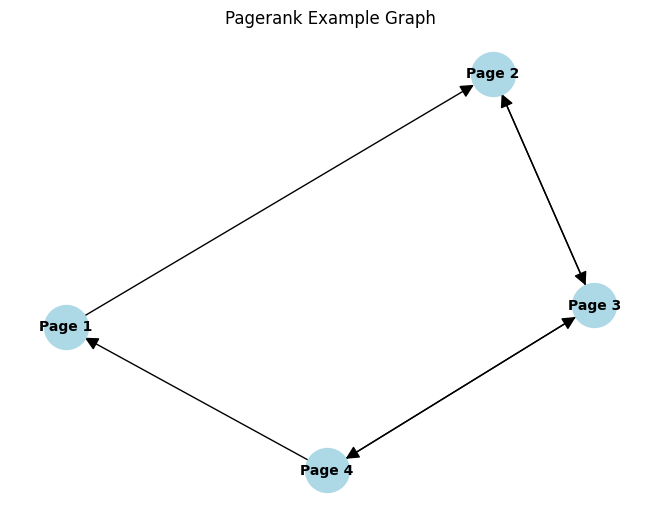

In [ ]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

adjacency_matrix = np.array([[0, 1, 0, 0],
                             [0, 0, 1, 0],
                             [0, 1, 0, 1],
                             [1, 0, 1, 0]])

G = nx.DiGraph()

num_pages = len(adjacency_matrix)
G.add_nodes_from(range(num_pages))


for i in range(num_pages):
    for j in range(num_pages):
        if adjacency_matrix[i, j] == 1:
            G.add_edge(i, j)

pos = nx.spring_layout(G)
labels = {i: f"Page {i + 1}" for i in range(num_pages)}
nx.draw(G, pos, with_labels=True, labels=labels, node_size=1000, node_color='lightblue', font_size=10, font_color='black', font_weight='bold', arrowsize=20)
plt.title("Pagerank Example Graph")
plt.show()

In [ ]:
import networkx as nx
import numpy as np

def CreatePageRank(aGraph):
    nodes_set = len(aGraph)
    M = nx.to_numpy_array(aGraph)   # Menggunakan metode to_numpy_array
    outwards = np.squeeze(np.asarray(np.sum(M, axis=1)))
    prob_outwards = np.array(1.0 / outwards)
    G = np.multiply(M, prob_outwards[:, np.newaxis])

    p = np.ones(nodes_set) / float(nodes_set)
    return G, p

# Contoh penggunaan:
myWeb = nx.DiGraph()
connections = [
    (1, 3), (2, 1), (2, 3),
    (3, 1), (3, 2), (3, 4),
    (4, 5), (5, 1), (5, 4)
]
myWeb.add_edges_from(connections)

G, p = CreatePageRank(myWeb)
print(G)

[[0.         1.         0.         0.         0.        ]
 [0.33333333 0.         0.33333333 0.33333333 0.        ]
 [0.5        0.5        0.         0.         0.        ]
 [0.         0.         0.         0.         1.        ]
 [0.5        0.         0.         0.5        0.        ]]


In [ ]:
import numpy as np

# Matriks adjacency (0 berarti tidak ada tautan, 1 berarti ada tautan)
adjacency_matrix = np.array([
    [0, 1, 0, 0, 1],
    [1, 0, 1, 1, 1],
    [0, 1, 0, 1, 0],
    [0, 1, 1, 0, 1],
    [1, 1, 0, 1, 0]
], dtype=float)

# Inisialisasi nilai awal PageRank
pagerank = np.ones(adjacency_matrix.shape[0], dtype=float)

# Faktor damping
damping_factor = 0.85

# Jumlah iterasi
num_iterations = 100

# Iterasi untuk menghitung PageRank
for _ in range(num_iterations):
    new_pagerank = np.zeros_like(pagerank)

    for i in range(adjacency_matrix.shape[0]):
        # Hitung jumlah tautan keluar dari halaman i
        num_outlinks = np.sum(adjacency_matrix[i, :])

        if num_outlinks > 0:
            for j in range(adjacency_matrix.shape[1]):
                if adjacency_matrix[i, j] == 1:
                    new_pagerank[j] += damping_factor * pagerank[i] / num_outlinks

    # Tambahkan faktor teleportasi (normalisasi)
    new_pagerank += (1 - damping_factor) / len(pagerank)

    pagerank = new_pagerank / np.sum(new_pagerank)  # Normalisasi agar stabil

# Hasil PageRank
print("Hasil PageRank:")
print(pagerank)


Hasil PageRank:
[0.14905878 0.27706493 0.14905878 0.21240876 0.21240876]


In [ ]:
import numpy as np

# Jumlah halaman
num_pages = 5

# Vectors of outlinks
outlinks = np.array([3, 2, 1, 2, 2])

# Vectors of inlinks
inlinks = np.array([1, 2, 1, 2, 1])

# Inisialisasi nilai awal PageRank
pagerank = np.ones(num_pages, dtype=float) / num_pages

# Faktor damping
damping_factor = 0.85

# Jumlah iterasi
num_iterations = 100


for _ in range(num_iterations):
    # Inisialisasi PageRank baru
    new_pagerank = np.zeros(num_pages, dtype=float)

    for i in range(num_pages):
        for j in range(num_pages):
            if i != j and outlinks[j] > 0:
                new_pagerank[i] += damping_factor * (pagerank[j] / outlinks[j])

    # Terapkan faktor damping dan tambahkan nilai konstan
    pagerank = (1 - damping_factor) / num_pages + new_pagerank

# Hasil PageRank
print("Hasil PageRank:")
for i, pr in enumerate(pagerank):
    print(f"Halaman {chr(ord('A')+i)}: {pr:.4f}")

Hasil PageRank:
Halaman A: 379781916076663755421777920.0000
Halaman B: 356329657326501560173199360.0000
Halaman C: 300635253803169860934434816.0000
Halaman D: 356329657326501628892676096.0000
Halaman E: 356329657326501628892676096.0000


In [ ]:
#LATIHAN

In [1]:
#Studi Kasus 1
import numpy as np

A = np.array([
    [0, 1, 1, 0],
    [0, 0, 0, 1],
    [1, 0, 0, 1],
    [0, 0, 1, 0]
], dtype=float)

n = A.shape[0]
out_link = A.sum(axis=0)
out_link[out_link == 0] = 1
M = A / out_link

d = 0.85
pr = np.ones(n) / n

for _ in range(100):
    pr = (1 - d) / n + d * M.dot(pr)

print("Hasil PageRank:", pr)

Hasil PageRank: [0.30174696 0.12175754 0.37824246 0.19825304]


In [ ]:
#Latihan page rank
import numpy as np

def pagerank_from_adjacency(A, d=0.85, tol=1e-6):
    """
    Calculates PageRank from an adjacency matrix.

    Args:
        A (np.ndarray): Adjacency matrix (0 means no link, 1 means link).
        d (float): Damping factor.
        tol (float): Tolerance for convergence.

    Returns:
        tuple: A tuple containing:
            - rank (np.ndarray): The PageRank values for each node.
            - iterations (int): The number of iterations taken for convergence.
    """
    n = A.shape[0]

    # Normalisasi kolom agar total keluarannya = 1 (kolom → link keluar)
    A_norm = np.copy(A).astype(float) # Create a copy to avoid modifying the original matrix
    for j in range(n):
        col_sum = np.sum(A_norm[:, j])
        if col_sum != 0:
            A_norm[:, j] /= col_sum
        else:
            # If column is empty (no outlinks), distribute the rank equally
            A_norm[:, j] = 1.0 / n


    # Inisialisasi rank awal
    rank = np.ones(n) / n
    iterations = 0

    # Iterasi PageRank
    while True:
        new_rank = (1 - d) / n + d * np.dot(A_norm, rank)
        iterations += 1
        if np.linalg.norm(new_rank - rank, 1) < tol:
            break
        rank = new_rank

    return rank, iterations

# Example usage with the original adjacency matrix
A = np.array([
    [0, 1, 0, 0, 1],
    [1, 0, 1, 1, 1],
    [0, 1, 0, 1, 0],
    [0, 1, 1, 0, 1],
    [1, 1, 0, 1, 0]
])

rank, iterations = pagerank_from_adjacency(A)

# Hasil PageRank
print("Nilai PageRank tiap node:")
for i, r in enumerate(rank):
    print(f"Node {i+1}: {r:.4f}")

Nilai PageRank tiap node:
Node 1: 0.1491
Node 2: 0.2771
Node 3: 0.1491
Node 4: 0.2124
Node 5: 0.2124


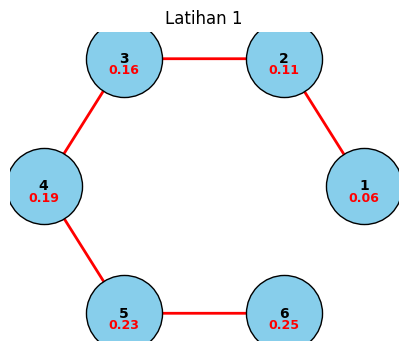

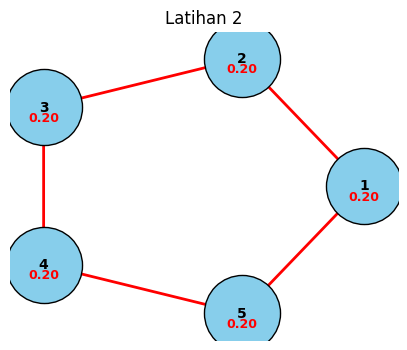

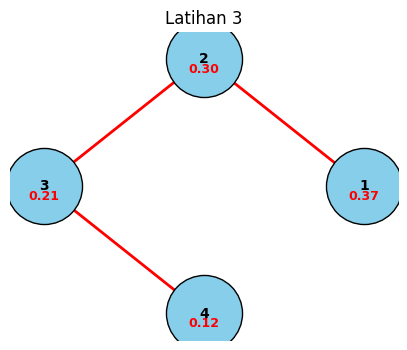

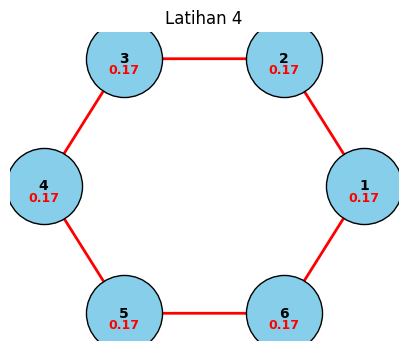

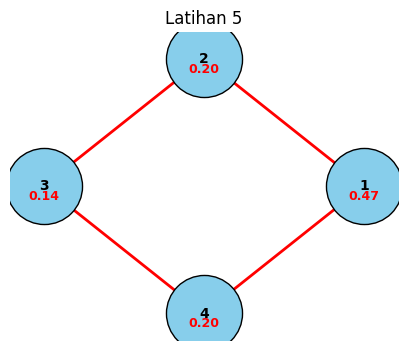

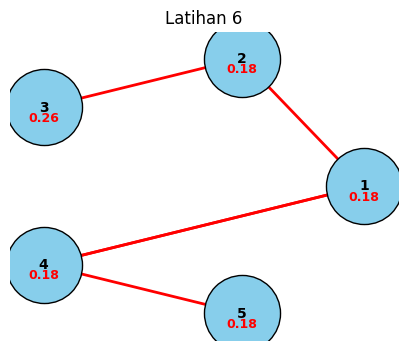

In [ ]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# === Fungsi PageRank manual ===
def pagerank_from_adjacency(A, alpha=0.85, tol=1e-8, max_iter=100):
    A = np.array(A, dtype=float)
    n = A.shape[0]
    outdeg = A.sum(axis=0)
    M = np.zeros_like(A, dtype=float)

    for j in range(n):
        if outdeg[j] == 0:
            M[:, j] = 1.0 / n
        else:
            M[:, j] = A[:, j] / outdeg[j]

    v = np.ones((n, 1)) / n
    r = v.copy()

    for it in range(max_iter):
        r_new = alpha * M.dot(r) + (1 - alpha) * v
        if np.linalg.norm(r_new - r, 1) < tol:
            break
        r = r_new

    return r.flatten()

# === Fungsi untuk menggambar dengan label rapi ===
def draw_graph(A, ranks, title):
    G = nx.DiGraph()
    n = len(A)
    nodes = list(range(1, n+1))

    for i in range(n):
        G.add_node(nodes[i])
    for j in range(n):
        for i in range(n):
            if A[i][j] == 1:
                G.add_edge(nodes[j], nodes[i])

    pos = nx.circular_layout(G)  # posisi melingkar agar rapi
    plt.figure(figsize=(5,4))
    nx.draw_networkx_nodes(G, pos, node_size=3000, node_color='skyblue', edgecolors='black')
    nx.draw_networkx_edges(G, pos, arrowstyle='-|>', arrowsize=20, edge_color='red', width=2)
    nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold', font_color='black')

    # Tambahkan label PageRank di bawah node (offset sedikit)
    label_pos = {k: (v[0], v[1] - 0.08) for k, v in pos.items()}
    labels = {nodes[i]: f"{ranks[i]:.2f}" for i in range(n)}
    nx.draw_networkx_labels(G, label_pos, labels=labels, font_color="red", font_size=9, font_weight='bold')

    plt.title(title)
    plt.axis("off")
    plt.show()


# =======================
# LATIHAN 1
A1 = [
    [0,0,0,0,0,0],
    [1,0,0,0,0,0],
    [0,1,0,0,0,0],
    [0,0,1,0,0,0],
    [0,0,0,1,0,0],
    [0,0,0,0,1,0],
]
r1 = pagerank_from_adjacency(A1)
draw_graph(A1, r1, "Latihan 1")


# =======================
# LATIHAN 2
A2 = [
    [0,0,0,0,1],
    [1,0,0,0,0],
    [0,1,0,0,0],
    [0,0,1,0,0],
    [0,0,0,1,0],
]
r2 = pagerank_from_adjacency(A2)
draw_graph(A2, r2, "Latihan 2")


# =======================
# LATIHAN 3
A3 = [
    [0,1,0,0],
    [0,0,1,0],
    [0,0,0,1],
    [0,0,0,0],
]
r3 = pagerank_from_adjacency(A3)
draw_graph(A3, r3, "Latihan 3")


# =======================
# LATIHAN 4
A4 = [
    [0,0,0,0,0,1],
    [1,0,0,0,0,0],
    [0,1,0,0,0,0],
    [0,0,1,0,0,0],
    [0,0,0,1,0,0],
    [0,0,0,0,1,0],
]
r4 = pagerank_from_adjacency(A4)
draw_graph(A4, r4, "Latihan 4")


# =======================
# LATIHAN 5
A5 = [
    [0,1,0,1],
    [0,0,1,0],
    [0,0,0,0],
    [0,0,1,0],
]
r5 = pagerank_from_adjacency(A5)
draw_graph(A5, r5, "Latihan 5")


# =======================
# LATIHAN 6
A6 = [
    [0,0,0,1,0],
    [1,0,0,0,0],
    [0,1,0,0,0],
    [1,0,0,0,0],
    [0,0,0,1,0],
]
r6 = pagerank_from_adjacency(A6)
draw_graph(A6, r6, "Latihan 6")
